<a href="https://colab.research.google.com/github/RayBMGDias/data-driven-insights/blob/main/data_driven_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
%pip install pandas
%pip install numpy
%pip install matplotlib

In [25]:
import pandas as pd

##Leitura e Exploração Inicial da Base


In [26]:
df = pd.read_csv('/content/sales_data_sample.csv', encoding='latin1') # arquivo CSV escolhido
df.head() # 5 primeiras linhas

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [27]:
print(df.shape) # Quantidade de linhas/colunas
print(df.columns) # Nome das colunas
print(df.dtypes) #Tipos de dados detectados pelo pandas

(2823, 25)
Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')
ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERR

In [28]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE']) # Converte a coluna 'ORDERDATE' para o tipo datetime64[ns]
df['ORDERDATE'].head()

,ORDERDATE
0,2003-02-24
1,2003-05-07
2,2003-07-01
3,2003-08-25
4,2003-10-10


In [29]:
print(df.dtypes)

ORDERNUMBER                  int64
QUANTITYORDERED              int64
PRICEEACH                  float64
ORDERLINENUMBER              int64
SALES                      float64
ORDERDATE           datetime64[ns]
STATUS                      object
QTR_ID                       int64
MONTH_ID                     int64
YEAR_ID                      int64
PRODUCTLINE                 object
MSRP                         int64
PRODUCTCODE                 object
CUSTOMERNAME                object
PHONE                       object
ADDRESSLINE1                object
ADDRESSLINE2                object
CITY                        object
STATE                       object
POSTALCODE                  object
COUNTRY                     object
TERRITORY                   object
CONTACTLASTNAME             object
CONTACTFIRSTNAME            object
DEALSIZE                    object
dtype: object


## Listas, Dicionários e Tuplas

In [30]:
# Extrair a coluna 'ORDERNUMBER' como lista Python
lista_ordens = df['ORDERNUMBER'].tolist()

# Loop para imprimir informações de cada pedido
for i, ordem in enumerate(lista_ordens[:5]):
    print(f'Pedido {i}: Número {ordem}')

Pedido 0: Número 10107
Pedido 1: Número 10121
Pedido 2: Número 10134
Pedido 3: Número 10145
Pedido 4: Número 10159


In [31]:
produto_categoria = dict(zip(df['PRODUCTCODE'], df['PRODUCTLINE']))

# Exibir os 3 primeiros pares
for i, (produto, categoria) in enumerate(produto_categoria.items()):
    if i >= 3:
        break
    print(f'Produto: {produto} → Categoria: {categoria}')

Produto: S10_1678 → Categoria: Motorcycles
Produto: S10_1949 → Categoria: Classic Cars
Produto: S10_2016 → Categoria: Motorcycles


In [32]:
# Selecionar a primeira linha do DataFrame
linha = df.iloc[0]

# Criar a tupla com três informações da linha
tupla_info = (linha['ORDERNUMBER'], linha['CUSTOMERNAME'], linha['SALES'])

# Imprimir a tupla
print('Tupla de informações:')
print(tupla_info)

Tupla de informações:
(np.int64(10107), 'Land of Toys Inc.', np.float64(2871.0))


## Estruturas Condicionais e Laços

In [33]:
# Escolha uma coluna numérica adequada
coluna_numerica = 'QUANTITYORDERED'
primeiro_valor = df[coluna_numerica][0]

# Estrutura condicional personalizada:
if primeiro_valor > 45:
    print('Quantidade:', primeiro_valor, ' - Valor alto')
elif primeiro_valor > 30:
    print('Quantidade:', primeiro_valor, ' - Valor intermediário')
else:
    print('Quantidade:', primeiro_valor, ' - Valor baixo')

Quantidade: 30  - Valor baixo


In [34]:
soma = 0
lista = list(df[coluna_numerica][:5])
for n in lista:
    soma += n
print('Soma dos 5 primeiros valores:', soma)

Soma dos 5 primeiros valores: 199


In [35]:
limite = 50
# Inicializar o índice
i = 0

# Enquanto não passar do fim da lista e o valor for menor ou igual ao limite
while i < len(lista) and lista[i] <= limite:
    i += 1

# Verificar se encontrou
if i < len(lista):
    print('Primeiro valor >', limite, 'encontrado:', lista[i])
else:
    print('Nenhum valor maior que', limite, 'encontrado.')

Nenhum valor maior que 50 encontrado.


## Operadores Aritméticos e Manipulação de Dados

In [36]:
# Calcular diferença entre MSRP (preço sugerido) e PRICEEACH (preço unitário vendido)
if 'MSRP' in df.columns and 'PRICEEACH' in df.columns:
    df['DIFERENCA'] = df['MSRP'] - df['PRICEEACH']
    print(df[['MSRP', 'PRICEEACH', 'DIFERENCA']].head())

   MSRP  PRICEEACH  DIFERENCA
0    95      95.70      -0.70
1    95      81.35      13.65
2    95      94.74       0.26
3    95      83.26      11.74
4    95     100.00      -5.00


In [37]:
# Aplicar desconto de 10% no preço unitário (PRICEEACH)
if 'PRICEEACH' in df.columns:
    df['PRECO_COM_DESCONTO'] = df['PRICEEACH'] * 0.9
    print(df[['PRICEEACH', 'PRECO_COM_DESCONTO']].head())

   PRICEEACH  PRECO_COM_DESCONTO
0      95.70              86.130
1      81.35              73.215
2      94.74              85.266
3      83.26              74.934
4     100.00              90.000


##  NumPy e Arrays Numéricos

In [38]:
import numpy as np

In [39]:
# Criar array NumPy a partir da coluna 'SALES'
array_sales = np.array(df['SALES'])

# Mostrar os 5 primeiros elementos do array
print(array_sales[:5])

[2871.   2765.9  3884.34 3746.7  5205.27]


In [40]:
# Operação 1: multiplicar todos os valores por 1.1 (simulando aumento de 10%)
aumento = array_sales * 1.1

# Operação 2: elevar todos os valores ao quadrado
quadrado = array_sales ** 2

# Exibir os 5 primeiros resultados de cada operação
print('Valores originais:', array_sales[:5])
print('Com aumento de 10%:', aumento[:5])
print('Elevados ao quadrado:', quadrado[:5])

Valores originais: [2871.   2765.9  3884.34 3746.7  5205.27]
Com aumento de 10%: [3158.1   3042.49  4272.774 4121.37  5725.797]
Elevados ao quadrado: [ 8242641.      7650202.81   15088097.2356 14037760.89   27094835.7729]


In [41]:
# Acessar: imprimir o primeiro valor
print('Primeiro valor:', array_sales[0])

# Fatiar: imprimir os 5 primeiros valores
print('5 primeiros valores:', array_sales[:5])

# Modificar: alterar o segundo valor (índice 1) para 559.99
array_sales[1] = 559.99

# Verificar a modificação
print('Valor alterado no índice 1:', array_sales[1])
print('Array atualizado (primeiros 5):', array_sales[:5])

Primeiro valor: 2871.0
5 primeiros valores: [2871.   2765.9  3884.34 3746.7  5205.27]
Valor alterado no índice 1: 559.99
Array atualizado (primeiros 5): [2871.    559.99 3884.34 3746.7  5205.27]


In [42]:
print('Soma dos elementos:', array_sales.sum())
print('Média dos elementos:', array_sales.mean())

Soma dos elementos: 10030422.94
Média dos elementos: 3553.1076656039672


## Acesso e Manipulação de Dados com Pandas

In [43]:
# Usando .loc (rótulo/nomes)
df_loc = df.loc[0:4, ['CUSTOMERNAME', 'COUNTRY', 'SALES']]
print(df_loc)

               CUSTOMERNAME COUNTRY    SALES
0         Land of Toys Inc.     USA  2871.00
1        Reims Collectables  France  2765.90
2           Lyon Souveniers  France  3884.34
3         Toys4GrownUps.com     USA  3746.70
4  Corporate Gift Ideas Co.     USA  5205.27


In [44]:
# Usando .iloc (índice numérico)
df_iloc = df.iloc[0:5, [0, 1, 4]]
print(df_iloc)

   ORDERNUMBER  QUANTITYORDERED    SALES
0        10107               30  2871.00
1        10121               34  2765.90
2        10134               41  3884.34
3        10145               45  3746.70
4        10159               49  5205.27


In [45]:
# Filtrando por condição
df_filtro = df[df['SALES'] > 4000][['CUSTOMERNAME', 'SALES']]
print(df_filtro.head())

                CUSTOMERNAME    SALES
4   Corporate Gift Ideas Co.  5205.27
7               Herkku Gifts  5512.32
9           Auto Canal Petit  4708.44
14         La Rochelle Gifts  4177.35
15      Marta's Replicas Co.  4099.68


In [46]:
#Filtrar por texto (clientes dos EUA)
clientes_usa = df[df['COUNTRY'] == 'USA'][['CUSTOMERNAME', 'COUNTRY']]
print(clientes_usa.head())

               CUSTOMERNAME COUNTRY
0         Land of Toys Inc.     USA
3         Toys4GrownUps.com     USA
4  Corporate Gift Ideas Co.     USA
5      Technics Stores Inc.     USA
8           Mini Wheels Co.     USA


In [47]:
from IPython.display import Markdown, display

# Contar quantos pedidos existem por status
status_counts = df['STATUS'].value_counts()

# Gerar tabela Markdown
md_status = '### Quantidade de pedidos por status\n\n'
md_status += '| Status      | Quantidade |\n'
md_status += '|-------------|------------|\n'
for status, count in status_counts.items():
    md_status += f'| {status} | {count} |\n'

display(Markdown(md_status))

### Quantidade de pedidos por status

| Status      | Quantidade |
|-------------|------------|
| Shipped | 2617 |
| Cancelled | 60 |
| Resolved | 47 |
| On Hold | 44 |
| In Process | 41 |
| Disputed | 14 |


In [48]:
# Agrupar por linha de produto e somar as vendas
vendas_produto = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)

# Criar tabela em Markdown
md = '### Vendas Totais por Linha de Produto\n\n'
md += '| Linha de Produto     | Vendas Totais |\n'
md += '|----------------------|----------------|\n'

for produto, total in vendas_produto.items():
    md += f'| {produto} | ${total:,.2f} |\n'

# Exibir como Markdown
display(Markdown(md))

### Vendas Totais por Linha de Produto

| Linha de Produto     | Vendas Totais |
|----------------------|----------------|
| Classic Cars | $3,919,615.66 |
| Vintage Cars | $1,903,150.84 |
| Motorcycles | $1,166,388.34 |
| Trucks and Buses | $1,127,789.84 |
| Planes | $975,003.57 |
| Ships | $714,437.13 |
| Trains | $226,243.47 |


In [49]:
# Contar quantos clientes existem por país
clientes_por_pais = df['COUNTRY'].value_counts().head(10)

# Criar a tabela em Markdown
md = '### Top 10 Países com Mais Clientes\n\n'
md += '| País         | Quantidade de Clientes |\n'
md += '|--------------|------------------------|\n'

for pais, quantidade in clientes_por_pais.items():
    md += f'| {pais} | {quantidade} |\n'

display(Markdown(md))

### Top 10 Países com Mais Clientes

| País         | Quantidade de Clientes |
|--------------|------------------------|
| USA | 1004 |
| Spain | 342 |
| France | 314 |
| Australia | 185 |
| UK | 144 |
| Italy | 113 |
| Finland | 92 |
| Norway | 85 |
| Singapore | 79 |
| Canada | 70 |


## Visualização de Dados

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
# Garantir que a coluna de data esteja no formato datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Agrupar por mês (ou dia) e somar as vendas
vendas_por_mes = df.groupby(df['ORDERDATE'].dt.to_period('M'))['SALES'].sum()

# Converter o índice para datetime novamente para plotagem
vendas_por_mes.index = vendas_por_mes.index.to_timestamp()

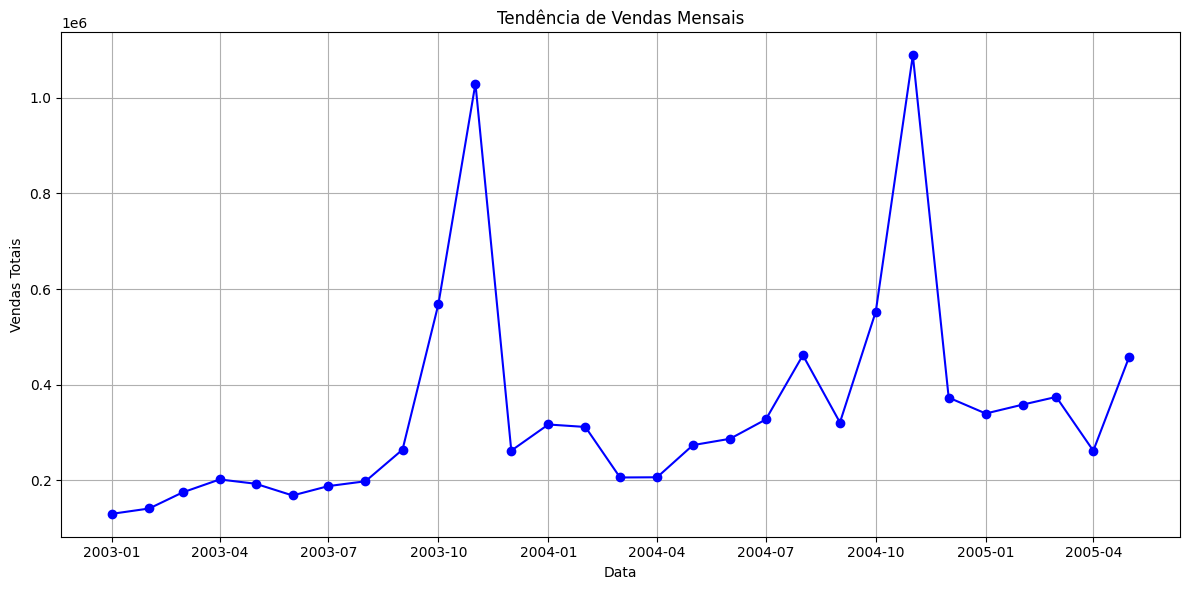

In [52]:
# Plotar o gráfico de linha
plt.figure(figsize=(12, 6))
plt.plot(vendas_por_mes.index, vendas_por_mes.values, marker='o', color='blue', linestyle='-')
plt.title('Tendência de Vendas Mensais')
plt.xlabel('Data')
plt.ylabel('Vendas Totais')
plt.grid(True)
plt.tight_layout()
plt.show()

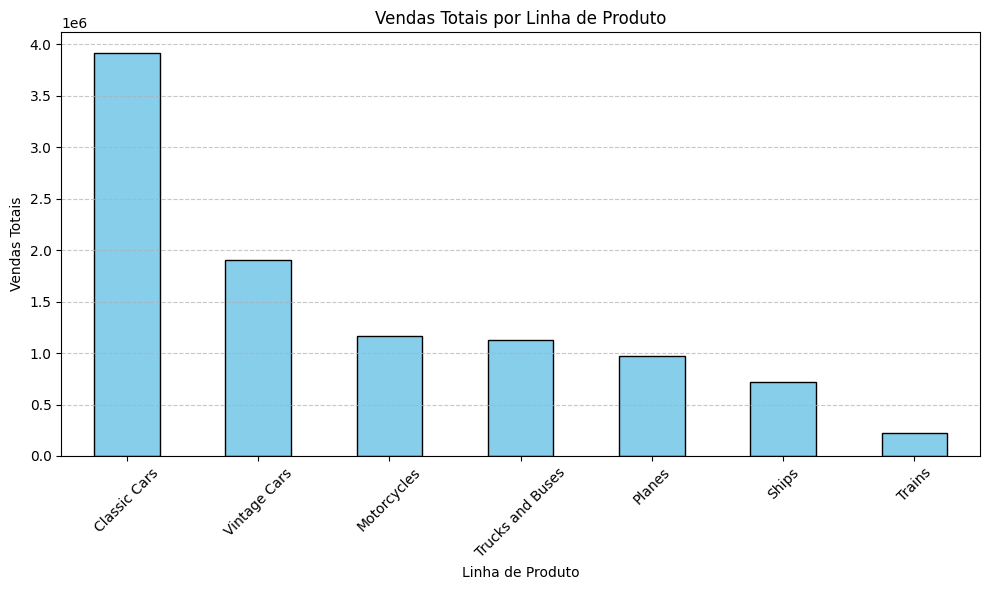

In [53]:
# Agrupar os dados por linha de produto e somar as vendas
vendas_produtos = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
vendas_produtos.plot(kind='bar', color='skyblue', edgecolor='black')

# Título e rótulos
plt.title('Vendas Totais por Linha de Produto')
plt.xlabel('Linha de Produto')
plt.ylabel('Vendas Totais')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

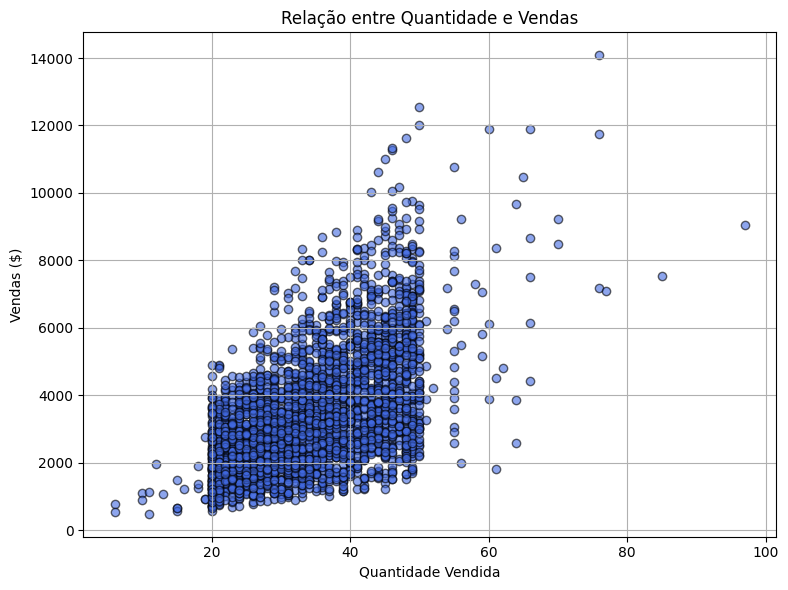

In [54]:
# Verifique se as colunas existem no seu DataFrame
if 'SALES' in df.columns and 'QUANTITYORDERED' in df.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(df['QUANTITYORDERED'], df['SALES'], alpha=0.6, color='royalblue', edgecolors='k')
    plt.xlabel('Quantidade Vendida')
    plt.ylabel('Vendas ($)')
    plt.title('Relação entre Quantidade e Vendas')
    plt.grid(True)
    plt.tight_layout()
    cols = ['QUANTITYORDERED', 'SALES', 'PRODUCTLINE', 'PRICEEACH']
    plt.show()



---



# **Relatório Final do Projeto de Análise de Dados**
Base analisada: Base de vendas e clientes (https://www.kaggle.com/datasets/kyanyoga/sample-sales-data)

---


Neste notebook, explorei uma base de dados rica, aplicando uma variedade de técnicas e ferramentas para entender melhor os dados e gerar insights relevantes.


---
### **Ferramentas e Linguagens Utilizadas**

**Linguagem:** Python

**Bibliotecas principais:**

- pandas para manipulação e análise de dados tabulares

- numpy para operações matemáticas vetorizadas e manipulação eficiente de arrays

- matplotlib para visualização gráfica

- IPython.display para renderização de Markdown dentro do notebook

### **Principais Técnicas e Ferramentas Utilizadas**
Uso de listas, dicionários e tuplas:

- Extraí dados de colunas para listas para manipulações básicas.

- Criei dicionários para relacionar dados importantes (ex: nome e sobrenome dos clientes).

- Utilizei tuplas para agrupar informações distintas de uma linha, facilitando o armazenamento e análise estruturada.

Estruturas condicionais e loops:

- Empreguei if/elif/else para categorizar valores numéricos em classes (ex: alto, médio, baixo).

- Usei laços for para operações acumulativas, como somar os primeiros valores de uma lista.

- Utilizei laços while para buscar e contar valores que satisfazem certas condições.

Manipulação de colunas com pandas:

- Selecionei e filtrei colunas específicas usando .loc e .iloc.

- Realizei operações matemáticas entre colunas para criar novas métricas (ex: diferença e desconto).

- Tratei valores faltantes e converti tipos de dados para análise adequada.

Operações com arrays NumPy

- Convertei colunas pandas para arrays NumPy para operações vetorizadas eficientes.

- Apliquei transformações matemáticas (soma, multiplicação, potência) diretamente nos arrays.

- Usei operações agregadas como soma e média para sumarizar os dados rapidamente.

Filtragens, agrupamentos e resumos com pandas:

- Filtrei dados por condições específicas para análises focadas.

- Agrupei dados usando .groupby() para somar vendas por país, linha de produto e outras categorias.

- Usei .value_counts() para contar ocorrências em colunas categóricas.

- Criei tabelas resumidas e apresentei resultados em Markdown para melhor visualização.

Gráficos com matplotlib:

- Criei gráficos de linha para mostrar tendências de vendas ao longo do tempo.

- Desenvolvi gráficos de barras para comparar vendas entre categorias relevantes.

- Usei gráficos de dispersão para analisar a relação entre quantidade vendida e valor de vendas, incluindo customização por categorias e tamanhos.


---


## **Insights e Descobertas**

- Identifiquei que certos países (ex: USA, France) concentram a maior parte das vendas.

- Linhas de produtos como Classic Cars dominam o faturamento, sugerindo áreas-chave para foco estratégico.

- Há uma correlação positiva entre quantidade vendida e vendas totais, embora com pontos fora do padrão que merecem investigação.

- A base apresenta oportunidades para limpeza e padronização dos dados textuais para análises futuras.

- A análise temporal mostra sazonalidades claras, com picos e quedas em períodos específicos.

- Operações vetorizadas e agrupamentos facilitaram análises rápidas e eficientes dos dados.

## **Próximos Passos**
- Investigar padrões e sazonalidades nos picos de vendas.

- Analisar impacto de preço e perfil de clientes nas vendas totais.

- Explorar segmentação detalhada por território e linha de produto para otimização de campanhas.

- Automatizar processos e criar dashboards interativos para monitorar métricas-chave em tempo real.



---


# Principais Tipos de Dados em Python e Pandas


---


1. int – Número Inteiro
Representa números inteiros, sem parte decimal.

Usado para contagens, identificadores, quantidades.

Exemplos: 10, -3, 0, 2025

```
idade = 25         # int
type(idade)  # <class 'int'>
```

2. float – Número Decimal (Ponto Flutuante)
Representa números reais, com parte decimal.

Usado para valores como preços, médias, porcentagens.

Exemplos: 10.5, -0.75, 3.14

```
preco = 19.99      # float
type(preco)  # <class 'float'>
```

3. str – String (Texto)
Representa uma sequência de caracteres (texto).

Usado para nomes, categorias, datas em formato textual.

Exemplos: "Brasil", '2025-07-31'

```
nome = "Rayra"
type(nome)  # <class 'str'>
```

4. bool – Booleano (Verdadeiro ou Falso)
Representa valores lógicos: True ou False.

Muito usado em condições e filtros.

```
ativo = True
type(ativo)  # <class 'bool'>
```

5. datetime – Data e Hora
Representa valores de data e/ou hora.

No Pandas, é tratado como datetime64[ns].

Exemplo: 2025-07-31 00:00:00
```
import pandas as pd
data = pd.to_datetime("2025-07-31")
type(data)  # <class 'pandas._libs.tslibs.timestamps.Timestamp'>
```

6. object – Tipo Genérico (Pandas)
No Pandas, object normalmente significa texto (str), mas também pode conter mistura de tipos.

Por isso, é um tipo genérico.

```
df.dtypes  # Mostra object para colunas textuais
```

## tabela resumo formatada em Markdown

| Tipo de Dado | Descrição                         | Exemplo           |
|--------------|-----------------------------------|-------------------|
| `int`        | Número inteiro                    | `5`, `-100`       |
| `float`      | Número decimal                    | `3.14`, `0.0`     |
| `str`        | Texto                             | `"Olá"`, `"NY"`   |
| `bool`       | Valor lógico (booleano)           | `True`, `False`   |
| `datetime`   | Data e/ou hora                    | `2025-07-31`      |
| `object`     | Tipo genérico (normalmente texto) | `"Shipped"`       |
